In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
# import nltk

# Zad. 
Wczytaj dane zawierające informacje o piosenkach.

Dane trzeba rozpakować.

https://www.kaggle.com/laowingkin/song-text-mining-and-clustering/data

In [3]:
df = pd.read_csv('songdata.csv')
df['text'] = df['text'].str.replace('\n', '')
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face And i..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please Touch me gently ..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go Why I had to ...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong You're encha..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun Couldn't sleep...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby I'm sitting all alon...


# Uwaga
Zmniejszam zbiór danych.

In [4]:
y = df["artist"]#.values[:1000]
X = df["text"]#.values[:1000]

In [5]:
# X[ y == i ][:num].shape

In [6]:
num=10
X_set = []
Y_set =[]
for i in np.unique(y):
    X_set = X_set+ list(X[ y == i ][:num])
    Y_set = Y_set + list(y[ y == i ][:num])

In [7]:
np.unique(y)

array(["'n Sync", 'ABBA', 'Ace Of Base', 'Adam Sandler', 'Adele',
       'Aerosmith', 'Air Supply', 'Aiza Seguerra', 'Alabama',
       'Alan Parsons Project', 'Aled Jones', 'Alice Cooper',
       'Alice In Chains', 'Alison Krauss', 'Allman Brothers Band',
       'Alphaville', 'America', 'Amy Grant', 'Andrea Bocelli',
       'Andy Williams', 'Annie', 'Ariana Grande', 'Ariel Rivera',
       'Arlo Guthrie', 'Arrogant Worms', 'Avril Lavigne',
       'Backstreet Boys', 'Barbie', 'Barbra Streisand', 'Beach Boys',
       'Beautiful South', 'Beauty And The Beast', 'Bee Gees',
       'Bette Midler', 'Bill Withers', 'Billie Holiday', 'Billy Joel',
       'Bing Crosby', 'Black Sabbath', 'Blur', 'Bob Dylan', 'Bob Marley',
       'Bob Rivers', 'Bob Seger', 'Bon Jovi', 'Boney M.', 'Bonnie Raitt',
       'Bosson', 'Bread', 'Britney Spears', 'Bruce Springsteen',
       'Bruno Mars', 'Bryan White', 'Cake', 'Carly Simon', 'Carol Banawa',
       'Carpenters', 'Cat Stevens', 'Celine Dion', 'Chaka Khan',
 

In [8]:
X_set[ Y_set == "Rammstein" ]

"Girl don't say that it's over  'Cause you are a part of me, yeah  Girl just hold on, please tell me what is wrong with us  Could it be that you're lonely  Could it be that I didn't care  Tell me please girl, that you are still feeling for me, oh  Girl where is the love that we used to know, our love  All these beautiful days that we used to share  Lord tell me please what can I do    (I will give you the best of my life)  (Yes I'll give you all that you need)  (Anything that you want I will give it to you)  (I will give you the best of my life)  (Yes I'll give you all that you need)  (Anything that you want I will give it to you)  I will give it to you    And you know that I miss you  And you know I can't live without you  I'm praying each day that your love will come back my way, oh yeah  In my dreams I still hold you  In my dreams are you still with me, yeah  Please don't hesitate, 'cause girl I can't wait for our love  Girl where is the love (where is the love)  That we used to kno

# Zad.

Proszę wykonać podstawową tekenizację biorąc pod uwagę:

 * bierzemy kolejne artykuły i dzieli go na tokeny
 * bierzemy listę tokenów i usuwamy punktory
 * bierzemy listę tokenów i usuwa liczby
 * bierzemy listę tokenów i zamieniamy na małe litery

a następnie stworzyć reprezentację **Tf-Idf**.

Użyj:

```python
from sklearn.feature_extraction.text import TfidfVectorizer
```

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string 

def sen2token(sentence):
    return word_tokenize(sentence)

def remove_punctuation(words):
    remove_list =  stopwords.words('english') + list(string.punctuation) + ['--', '."', '!"', '?"', ',"', '``', "''"]
    return [w for w in words if not w in set(remove_list)]

def remove_nummbers(words):
    return [w for w in words if not w.isdigit()]

def to_lower(words):
    return [w.lower() for w in words]

def stemming_tokenizer(words):
    words = sen2token(words)
    words = to_lower(words)    
    words = remove_punctuation(words)
    words = remove_nummbers(words)

    
    stemmer = PorterStemmer()
    return [stemmer.stem(w) for w in words]

#preprocessor działa na całym dokumencie
def my_preprocessing(word):
    return word

tfidf_vectorizer = TfidfVectorizer(preprocessor = my_preprocessing, tokenizer=stemming_tokenizer, stop_words=stopwords.words('english') + list(string.punctuation))

tfidf_vectorizer.fit(X_set)
# print( tfidf_vectorizer.vocabulary_ )
tfidf_matrix = tfidf_vectorizer.transform(X_set)
# print(tfidf_matrix.todense())

# Zad 
Ograniczmy się do 2 pierszych komponentów i narysujmy na płaszczyźnie nasze **piosenki**.

In [10]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2) 
svd.fit(tfidf_matrix)

docs_red = svd.transform(tfidf_matrix) 

docs_red # przeanalizujemy podobienstwo

array([[ 0.31566761,  0.15203371],
       [ 0.14967957,  0.08663085],
       [ 0.06769017, -0.03690929],
       ...,
       [ 0.20300239,  0.11379523],
       [ 0.12147633, -0.00196045],
       [ 0.22582162,  0.14978454]])

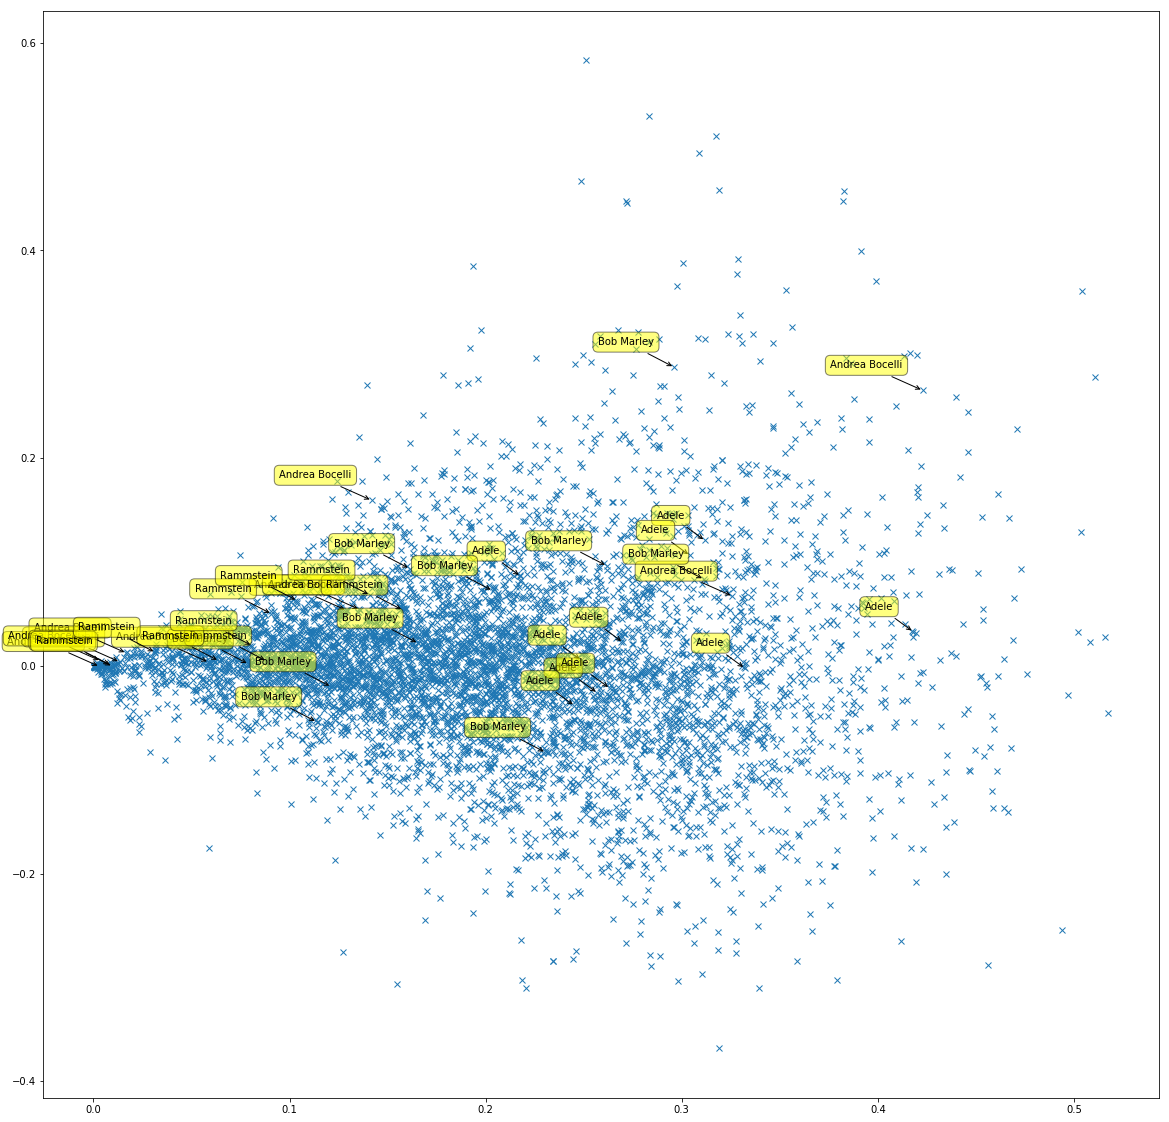

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = Y_set
for label, x, z in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    if( (label =="Adele") or ( label=="Andrea Bocelli") or (label=="Rammstein")  or (label=='Bob Marley')  ):
        plt.annotate(
            label,
            xy=(x, z), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()

# Zad 
W zredukowanej przestrzeni proszę zaznaczyć

```python
query = ["I love red roses"]
query_red = svd.transform( vectorizer.transform(query).todense() ) 
print(query_red)
```

In [12]:
query = ["I love red roses"]
query_red = svd.transform( tfidf_vectorizer.transform(query).todense() ) 
print(query_red)

[[0.07487749 0.1808593 ]]


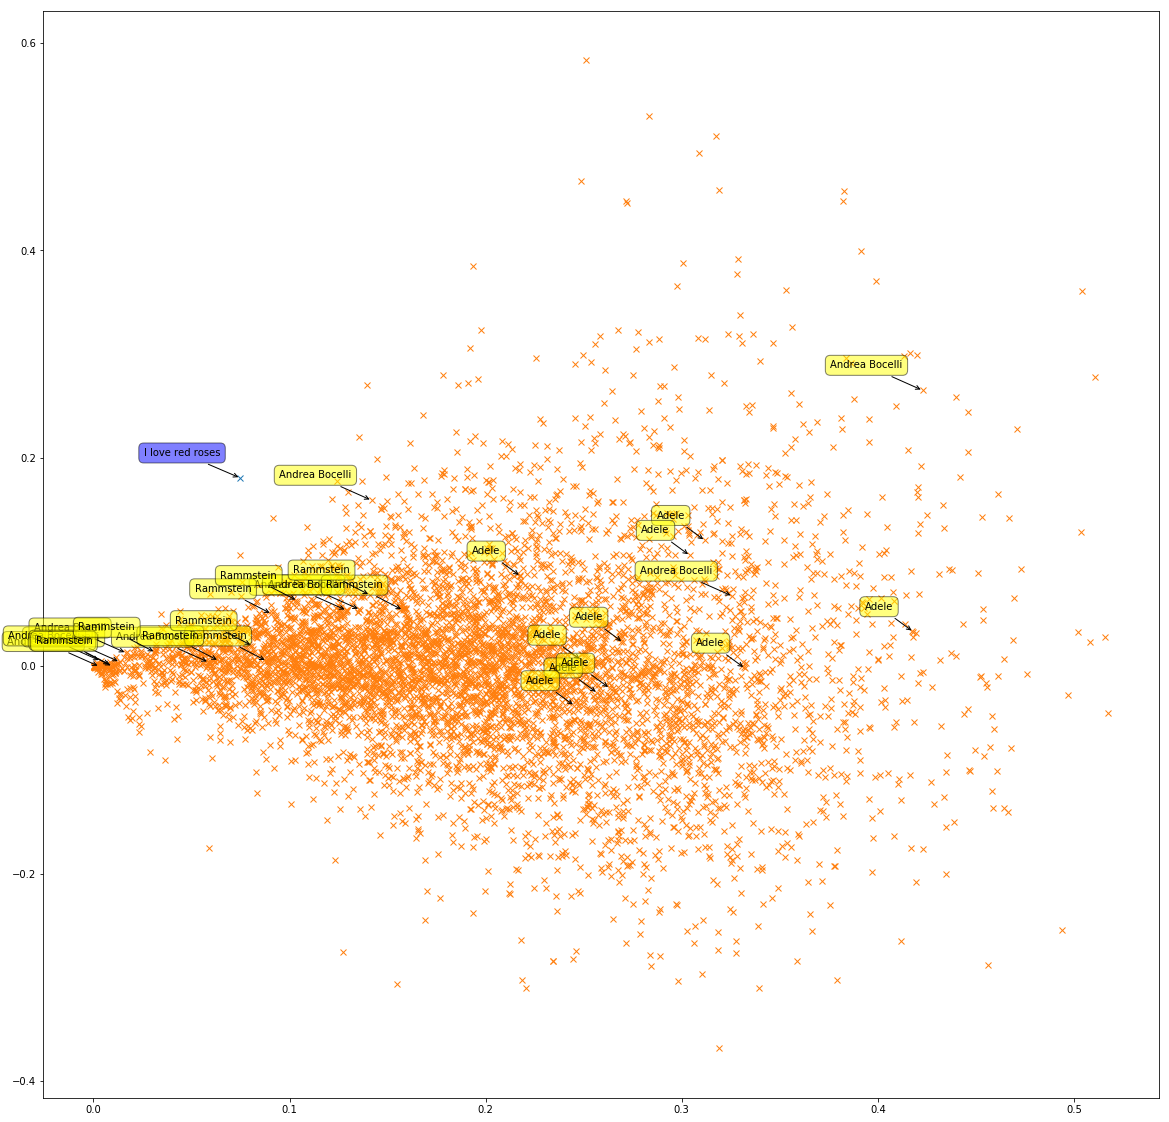

In [13]:
plt.figure(figsize=(20,20))

plt.plot(query_red[:, 0], query_red[:, 1], 'x')
plt.plot(docs_red[:, 0], docs_red[:, 1], 'x')
labels = Y_set
for label, x, y in zip(labels, docs_red[:, 0], docs_red[:, 1]):
    if( (label =="Adele") or ( label=="Andrea Bocelli") or (label=="Rammstein") ):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
labels = query
for label, x, y in zip(labels, query_red[:, 0], query_red[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
plt.show()